In [52]:
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

In [32]:
iris = datasets.load_iris()

In [41]:
X = iris.data
y= iris.target

In [42]:
X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,random_state=1)

/opt/homebrew/Caskroom/miniforge/base/envs/refreshing_nn/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


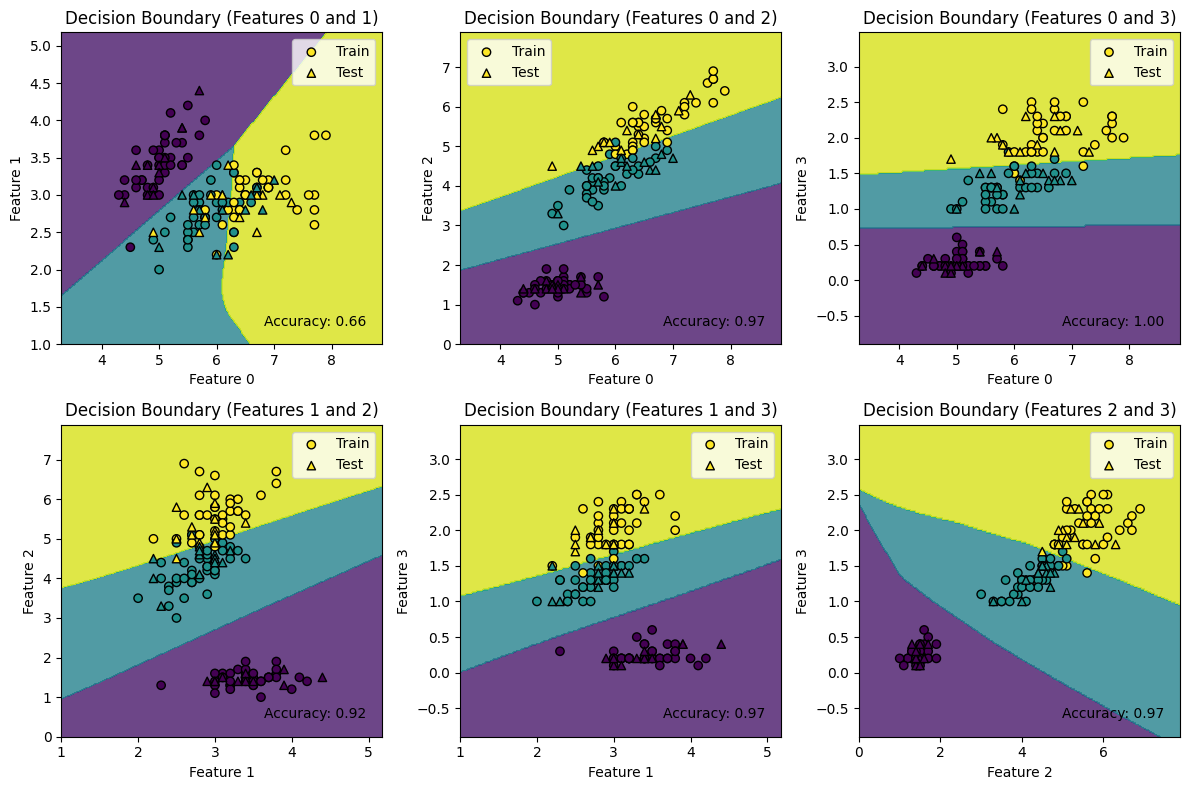

In [53]:
classifier = MLPClassifier(random_state=1,hidden_layer_sizes=(100,), max_iter=700).fit(X_train, y_train)
# print("Score is ",clf.score(X_test, y_test))
# Define the range of the plot
plot_step = 0.02
plot_step = 0.02
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create subplots for each pair of features
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Generate decision boundary plots for each feature pair
for i, (feat1, feat2) in enumerate(feature_pairs):
    # Select the corresponding feature columns
    X_train_subset = X_train[:, [feat1, feat2]]
    X_test_subset = X_test[:, [feat1, feat2]]

    # Define the range of the plot for the selected features
    x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
    y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    # Fit the classifier to the subset of training data
    classifier.fit(X_train_subset, y_train)

    # Predict the class for each point in the mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    row = i // 3
    col = i % 3
    axs[row, col].contourf(xx, yy, Z, alpha=0.8)

    # Scatter plot of the training and test data points
    axs[row, col].scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train, edgecolors='k', label='Train')
    axs[row, col].scatter(X_test_subset[:, 0], X_test_subset[:, 1], c=y_test, edgecolors='k', marker='^', label='Test')

    # Set the plot title and labels
    axs[row, col].set_title(f"Decision Boundary (Features {feat1} and {feat2})")
    axs[row, col].set_xlabel(f"Feature {feat1}")
    axs[row, col].set_ylabel(f"Feature {feat2}")

    # Show the legend
    axs[row, col].legend()

    # Calculate and display the accuracy score on the test data
    y_test_pred = classifier.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_test_pred)
    axs[row, col].text(0.95, 0.05, f"Accuracy: {accuracy:.2f}", transform=axs[row, col].transAxes,
                       horizontalalignment='right', verticalalignment='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

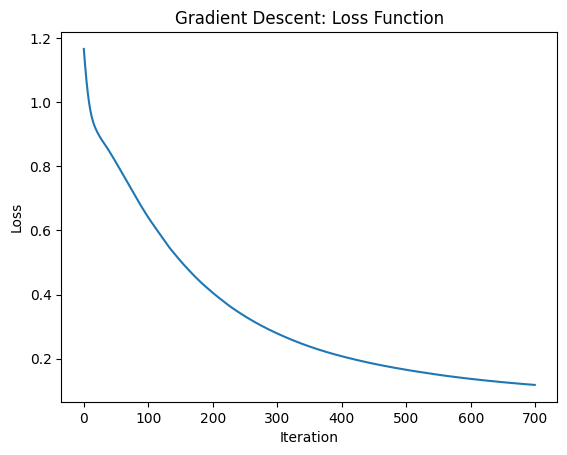

In [54]:
training_loss = classifier.loss_curve_

# Plot the training loss
plt.plot(training_loss)
plt.title("Gradient Descent: Loss Function")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()